In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import mannwhitneyu


In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
169,170,Male,32,87,63
161,162,Female,29,79,83
104,105,Male,49,62,56
133,134,Female,31,72,71


In [6]:
df.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [13]:
df.shape

(200, 5)

In [16]:
df = df.rename(columns={'Spending Score (1-100)': 'Spending Score', 'Genre': 'Sex'})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Sex                 200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


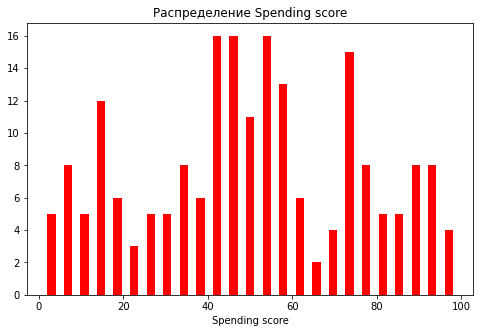

In [18]:
plt.figure(figsize = (8,5))
plt.hist(df['Spending Score'], bins = 25, rwidth = 0.5, color = 'red')
plt.xlabel('Spending score')
plt.title('Распределение Spending score')
plt.show();

## Стандартизируем количественные переменные

In [20]:
std_scaler = StandardScaler()
std_scaler.fit(df[['Age','Spending Score', 'Annual Income (k$)']])
std_scaled = std_scaler.transform(df[['Age','Spending Score', 'Annual Income (k$)']])
df[['std_age','std_SS', 'std_AI']] = std_scaled
df.sample(5)

,CustomerID,Sex,Age,Annual Income (k$),Spending Score,std_SS,std_AI,std_age
147,148,Female,32,77,74,0.923953,0.627505,-0.491602
18,19,Male,52,23,29,-0.823017,-1.433644,0.943732
142,143,Female,28,76,40,-0.395980,0.589336,-0.778669
96,97,Female,47,60,47,-0.124229,-0.021375,0.584899
92,93,Male,48,60,49,-0.046586,-0.021375,0.656665


### Распределение нормализованной переменной SS

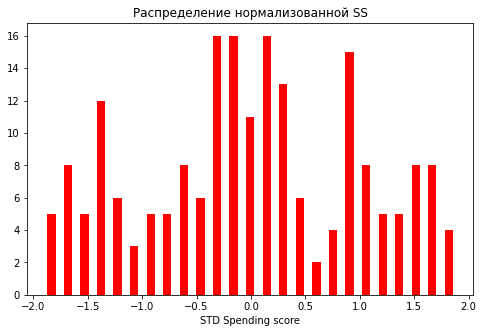

In [22]:
plt.figure(figsize = (8,5))
plt.hist(df['std_SS'], bins = 25, rwidth = 0.5, color = 'red')
plt.xlabel('STD Spending score')
plt.title('Распределение нормализованной SS')
plt.show();

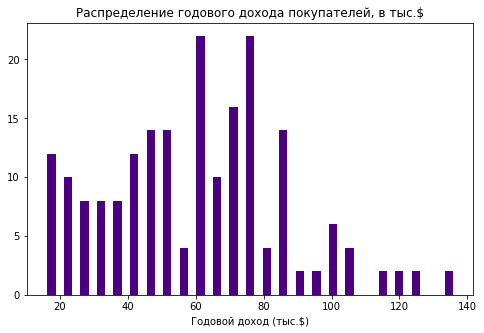

In [28]:
plt.figure(figsize = (8,5))
plt.hist(df['Annual Income (k$)'], bins = 25, rwidth = 0.5, color = 'indigo')
plt.xlabel('Годовой доход (тыс.$)')
plt.title('Распределение годового дохода покупателей, в тыс.$')
plt.show();

### Диаграмма рассеяния показателя SS от годового дохода
Можно обратить внимание, что для среднего класса с доходом 40-60 тыс$ показатель SS локализован в области 40-60

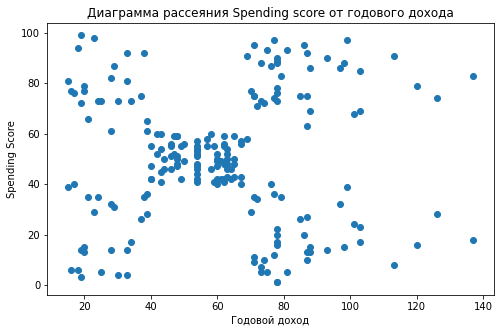

In [29]:
plt.figure(figsize = (8,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score'])
plt.xlabel('Годовой доход')
plt.ylabel('Spending Score')
plt.title('Диаграмма рассеяния Spending score от годового дохода')
plt.show();

Корреляция SS от годового дохода по обоим коэффициентам отсутствует, однако видно, что существуют определенные группы покупателей

In [30]:
df['Annual Income (k$)'].corr(df['Spending Score'])
#коэффициент Пирсона

0.009902848094037605

In [31]:
stats.spearmanr(df['Spending Score'], df['Annual Income (k$)'])
#коэффициент Спирмена (выборки распределены ненормально, поэтому к. Спирмена использовать разумнее)

SpearmanrResult(correlation=0.007839641317528493, pvalue=0.9122697727000879)

In [31]:
stats.spearmanr(df['Annual Income (k$)'], df['Spending Score'])

SpearmanrResult(correlation=0.007839641317528493, pvalue=0.9122697727000879)

Боксплот годового дохода. Медиана в районе 60 тыс$, верхняя граниица мкр 120 тыс$, значительных выбросов нет

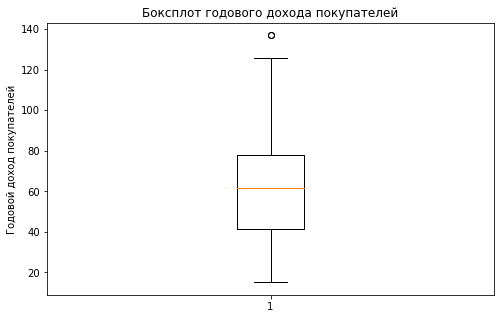

In [32]:
plt.figure(figsize = (8,5))
plt.boxplot(df['Annual Income (k$)'])
plt.ylabel('Годовой доход покупателей')
plt.title('Боксплот годового дохода покупателей')
plt.show();


Большинство покупателей женщины

In [12]:
stats = df.groupby('Sex', as_index = False).agg({'CustomerID': 'count'})
stats

,Sex,CustomerID
0,Female,112
1,Male,88


По критерию Манна-Уитни сравним доход женщин и мужчин. Нулевая гипотеза не отвергается, распределение доходов мужчин и женщин не отличается


In [26]:
mannwhitneyu(df[df['Sex'] == 'Male']['Annual Income (k$)'], df[df['Sex'] == 'Female']['Annual Income (k$)'], method="exact")

MannwhitneyuResult(statistic=5260.0, pvalue=0.41540664374851627)

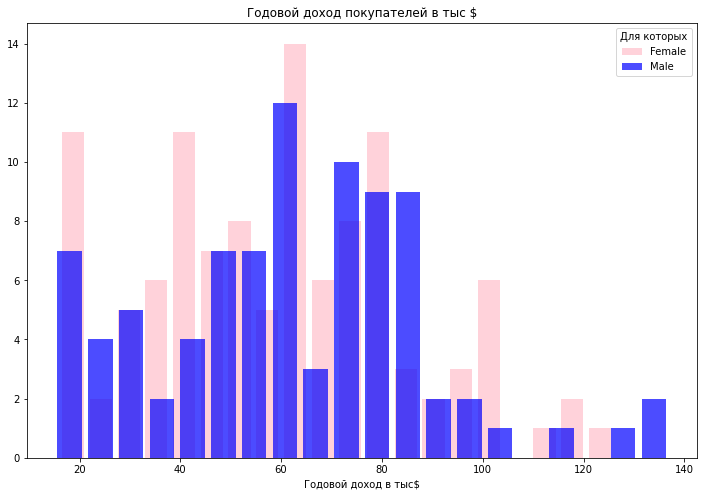

In [13]:
colors = {'Female': 'pink', 'Male': 'blue'}
fix, ax = plt.subplots(figsize = (12, 8))
for Sex in colors:
    color = colors[Sex]
    data = df[df['Sex'] == Sex]
    ax.hist(data['Annual Income (k$)'], bins = 20, rwidth = 0.8, color = color, alpha = 0.7)
plt.legend(colors, title = 'Для которых')
plt.xlabel('Годовой доход в тыс$')
plt.title('Годовой доход покупателей в тыс $')
plt.show();


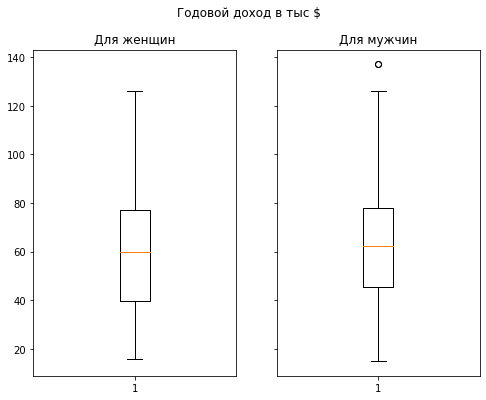

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6), sharey = True)
ax1.boxplot(df[df['Sex'] == 'Female']['Annual Income (k$)'])
ax2.boxplot(df[df['Sex'] == 'Male']['Annual Income (k$)'])
ax1.set_title('Для женщин')
ax2.set_title('Для мужчин')
fig.suptitle('Годовой доход в тыс $')
plt.show();

Распределение показателей SS для женщин и мужчин по критерию Манна-Уитни тоже существенно не отличается


In [27]:
mannwhitneyu(df[df['Sex'] == 'Male']['Spending Score'], df[df['Sex'] == 'Female']['Spending Score'], method="exact")

MannwhitneyuResult(statistic=4697.5, pvalue=0.572973776117475)

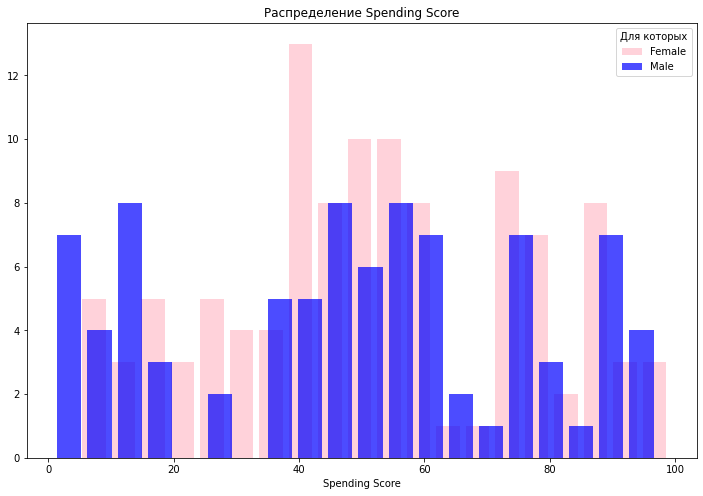

In [14]:
colors = {'Female': 'pink', 'Male': 'blue'}
fix, ax = plt.subplots(figsize = (12, 8))
for Sex in colors:
    color = colors[Sex]
    data = df[df['Sex'] == Sex]
    ax.hist(data['Spending Score'], bins = 20, rwidth = 0.8, color = color, alpha = 0.7)
plt.legend(colors, title = 'Для которых')
plt.xlabel('Spending Score')
plt.title('Распределение Spending Score')
plt.show();


In [ ]:
df[df['age_categories'] == 2]['Annual Income (k$)'].corr(df['Spending Score'])

0.13434087428900723

In [ ]:
df[df['age_categories'] == 2]['Annual Income (k$)'].corr(df['Spending Score'])

0.13434087428900723

## Проанализируем возраст

In [34]:
# сгруппируем медианные значения SS относительно возраста
stats_ss = df.groupby('Age', as_index = False).agg({'Spending Score': 'median'})
stats_ss = stats_ss.rename(columns={'Spending Score':'Median of SS'})
stats_ss.head()

,Age,Median of SS
0,18,53.5
1,19,48.0
2,20,49.0
3,21,73.0
4,22,76.0


In [42]:
stats_ai = df.groupby('Age', as_index = False).agg({'Annual Income (k$)': 'median'})
stats_ai = stats_ai.rename(columns={'Annual Income (k$)':'Median of AI'})
stats_ai.head()

,Age,Median of AI
0,18,53.5
1,19,63.5
2,20,37.0
3,21,33.0
4,22,20.0


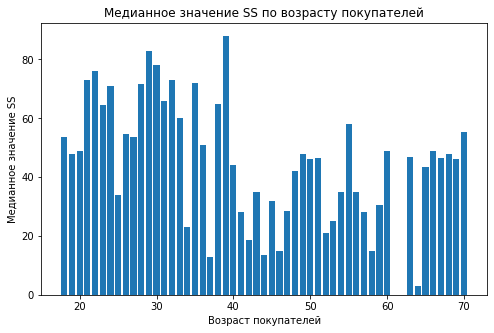

In [50]:

plt.figure(figsize = (8,5))
plt.bar(stats_ss['Age'], stats_ss['Median of SS'])
plt.xlabel('Возраст покупателей')
plt.ylabel('Медианное значение SS')
plt.title('Медианное значение SS по возрасту покупателей')
plt.show();

### SS выше у покупателей до 40 лет

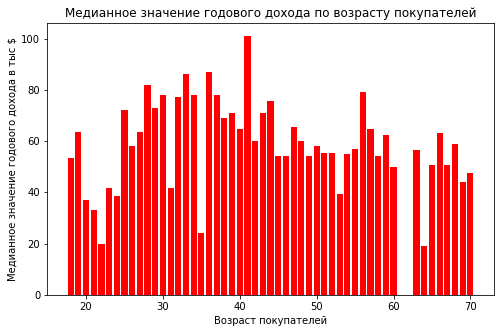

In [45]:
plt.figure(figsize = (8,5))
plt.bar(stats_ai['Age'], stats_ai['Median of AI'], color = 'red')
plt.xlabel('Возраст покупателей')
plt.ylabel('Медианное значение годового дохода в тыс $')
plt.title('Медианное значение годового дохода по возрасту покупателей')
plt.show();

In [51]:
stats_ss['Age'].corr(stats_ss['Median of SS'])

-0.43179485209961554

In [36]:
stats.spearmanr(df['Age'], df['Spending Score'])

SpearmanrResult(correlation=-0.3449397740165373, pvalue=5.674387092093432e-07)

Создадим новый признак - категория возраста. 1 - до 25 лет, 2 - от 26 до 60 и 3 - старше 60

In [98]:
df['age_categories'] = df.apply(lambda x: 3 if x.Age > 60 else (2 if x.Age > 25 else 1), axis = 1)

In [99]:
df.sample(5)

,CustomerID,Sex,Age,Annual Income (k$),Spending Score,std_SS,std_AI,std_age,age_categories
117,118,Female,49,65,59,0.341630,0.169472,0.728432,2
70,71,Male,70,49,55,0.186343,-0.441239,2.235532,3
37,38,Female,30,34,73,0.885132,-1.013780,-0.635135,2
74,75,Male,59,54,47,-0.124229,-0.250391,1.446099,2
83,84,Female,46,54,44,-0.240694,-0.250391,0.513132,2


### Построим диагамму рассеяния по группам возрастных категорий, можно заметить что для категории до 25 прослеживается корреляция, проверим это

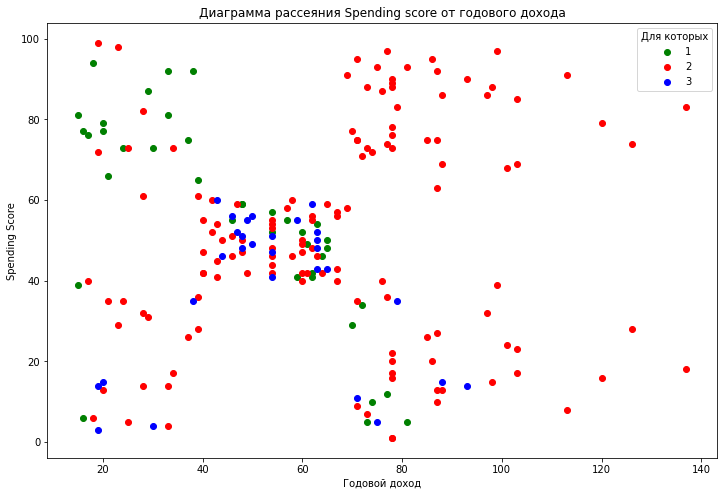

In [90]:
colors = {1: 'green', 2: 'red', 3: 'blue'}

fix, ax = plt.subplots(figsize = (12, 8))
for age_category in colors:
    color = colors[age_category]
    data = df[df['age_categories'] == age_category]
    ax.scatter(data['Annual Income (k$)'], data['Spending Score'], color = color)
plt.legend(colors, title = 'Для которых')
plt.xlabel('Годовой доход')
plt.ylabel('Spending Score')
plt.title('Диаграмма рассеяния Spending score от годового дохода')
plt.show();

действительно заметная отрицательная корреляция для людей моложе 25 лет

In [100]:
df[df['age_categories'] == 1]['Annual Income (k$)'].corr(df['Spending Score'])

-0.6757973130429957

In [101]:
#выборка людей до 25 лет состоит из 38 человек
len(df[df['age_categories'] == 1])

38

Корреляция для людей 26:60 отсутствует

In [102]:
df[df['age_categories'] == 2]['Annual Income (k$)'].corr(df['Spending Score'])

0.13434087428900723

Корреляция для людей старше 60 положительная и значительная, что может объясняться малым количеством наблюдений

In [104]:
df[df['age_categories'] == 3]['Annual Income (k$)'].corr(df['Spending Score'])

0.7831653445394777

In [87]:
len(df[df['age_categories'] == 3])

17

### Из корреляции можно предположить, что молодые люди с большим достатком предпочитают питаться в заведениях, поэтому отрицательная корреляция. 
### Либо наблюдений слишком мало

## Проверим связь между SS и AI по полу покупателей

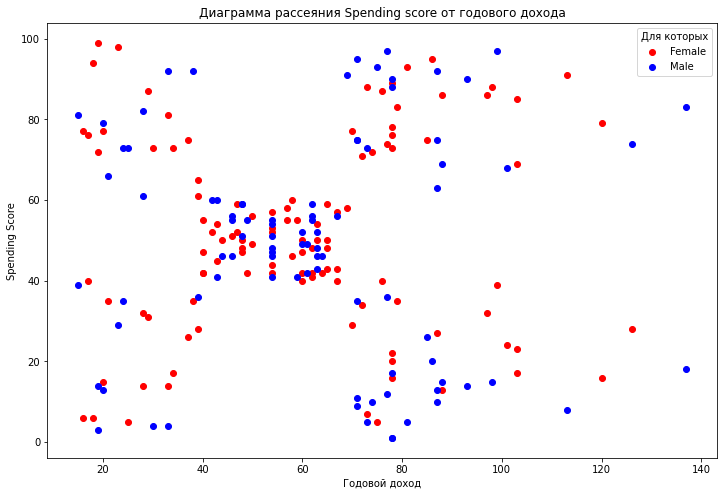

In [105]:
colors = {'Female': 'red', 'Male':'blue'}

fix, ax = plt.subplots(figsize = (12, 8))
for sex in colors:
    color = colors[sex]
    data = df[df['Sex'] == sex]
    ax.scatter(data['Annual Income (k$)'], data['Spending Score'], color = color)
plt.legend(colors, title = 'Для которых')
plt.xlabel('Годовой доход')
plt.ylabel('Spending Score')
plt.title('Диаграмма рассеяния Spending score от годового дохода')
plt.show();

### Результаты распределены равномерно, корреляции нет

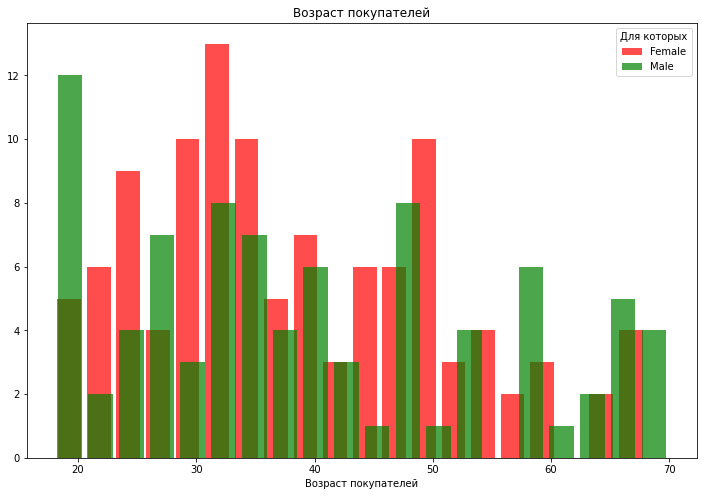

In [37]:
colors = {'Female': 'red', 'Male': 'green'}
fix, ax = plt.subplots(figsize = (12, 8))
for Sex in colors:
    color = colors[Sex]
    data = df[df['Sex'] == Sex]
    ax.hist(data['Age'], bins = 20, rwidth = 0.8, color = color, alpha = 0.7)
plt.legend(colors, title = 'Для которых')
plt.xlabel('Возраст покупателей')
plt.title('Возраст покупателей')
plt.show();

In [106]:
df.to_csv('new_mall_customers_TY.csv', index = False)